In [1]:
import numpy as np
import matplotlib.pyplot as plt
from module import generate_target_function, generate_data, pla, calculate_error, linear_target_function

## Perceptron
Do 1000 executions of:
1. Choose a target function.
2. Generate data from the distribution $(X \in [1, -1] \times [1, -1])$ and classify it with the target function.
3. Run the Perceptron algorithm initializing with the weight vector \(w\) set to zero.
4. Evaluate on a set of 10,000 test points.

#### Consider 𝑁 = 10. How many iterations does it take, on average, for the Perceptron Learning Algorithm (PLA) to converge?

(b) 15

In [2]:
def experiment(num_runs, num_traning_points, num_test_points):
    iterations_list = []
    disagreement_list = []

    for _ in range(num_runs):
        a, b, c = generate_target_function()
        lg_tg = linear_target_function(a, b, c)
        X, y = generate_data(num_traning_points,  lg_tg)
        w_int = np.zeros(X.shape[1] + 1)
        w, iterations = pla(X, y, w_int)
        X_test, y_test = generate_data(num_test_points,  lg_tg)
        disagreement = calculate_error(X_test, y_test, w)
        iterations_list.append(iterations)
        disagreement_list.append(disagreement)

    return np.mean(iterations_list), np.std(iterations_list), np.mean(disagreement_list), np.std(disagreement_list)

In [12]:
results_10 = experiment(1000, 10, 10000)

print(f"Iterations mean: {results_10[0]}")
print(f"Iterations std: {results_10[1]}")

Iterations mean: 10.043
Iterations std: 19.453923794443114


#### Which of the following is closest to $P[f(x) \neq g(x)]$ for N = 10?

(c) 0.1

In [14]:
print(f"Disagreements mean: {results_10[2]}")
print(f"Disagreements std: {results_10[3]}")

Disagreements mean: 0.1088442
Disagreements std: 0.07600336286217867


#### Now consider N = 100. How many iterations does it take, on average, for the PLA to converge with N = 100 training points? Choose the value closest to your result.

In [15]:
results_100 = experiment(1000, 100, 10000)

print(f"Iterations mean: {results_100[0]}")
print(f"Iterations std: {results_100[1]}")

Iterations mean: 109.948
Iterations std: 194.27429396603145


#### Which of the following is closest to $P[f(x) \neq g(x)]$ for N = 100?

In [63]:
print(f"Disagreements mean: {results_100[2]}")
print(f"Disagreements std: {results_100[3]}")

Disagreements mean: 0.0136173
Disagreements std: 0.01072237989953723


#### Scatterplot with the points used to calculate Eout, as well as the lines corresponding to the target function and the hypothesis g found

In [59]:

def plot_results(X, y, w, a, b_line, c_line):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    x_vals = np.linspace(-1, 1, 100)
    #y_vals = target_function_calc(a, b, c)
    plt.plot(x_vals, -(a / b_line) * x_vals - c_line / b_line, 'k-', label='Target Function')
    y_vals = -(w[0] + w[1] * x_vals) / w[2]
    plt.plot(x_vals, y_vals, label='Hyphotesis Function', color='green')
    plt.legend()
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.show()


##### With 10 poits for training and 1000 points for testing

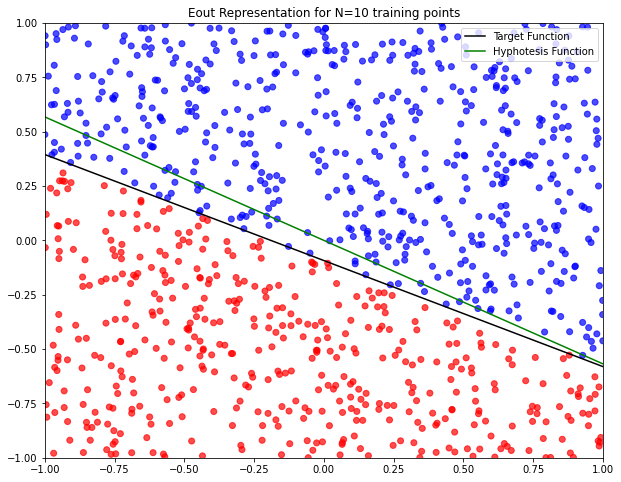

In [60]:
# 1 run plot
a, b, c = generate_target_function()
lg_tg = linear_target_function(a, b, c)
X, y = generate_data(10, lg_tg)
w_int = np.zeros(X.shape[1] + 1)
w, iterations = pla(X, y, w_int)
X_test, y_test = generate_data(1000, lg_tg)
plt.figure(figsize=(10, 8))
plt.title('Eout Representation for N=10 training points')
plot_results(X_test, y_test, w, a, b, c)

##### With 100 poits for training and 1000 points for testing

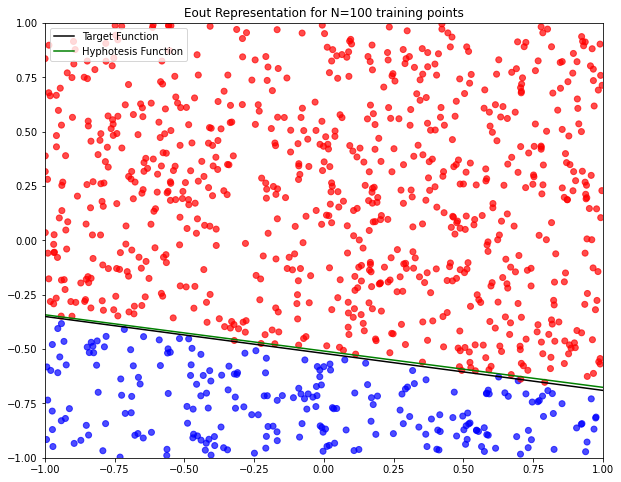

In [62]:
# 1 run plot
a, b, c = generate_target_function()
lg_tg = linear_target_function(a, b, c)
X, y = generate_data(100, lg_tg)
w_int = np.zeros(X.shape[1] + 1)
w, iterations = pla(X, y, w_int)
X_test, y_test = generate_data(1000, lg_tg)
plt.figure(figsize=(10, 8))
plt.title('Eout Representation for N=100 training points')
plot_results(X_test, y_test, w, a, b, c)